# Explicación

El objetivo es extraer información un web scraping que almacena información acerca del comportamiento del covid en el día de hoy, para poder resolver a ciertas consultas. Por ejemplo:
 - Países con mayor y menor cantidad de muertes a la fecha
 - Paises con mayor y menor casos detectados a la fecha
 - Países con mayor y menor uso de pruebas de descarte
 

# Código

## Importación de librerias

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

## Extraccion:
### Realizar la consulta a la web y generar el dataframe

In [3]:
def extraer_info_pais(lista_tr):
    # Iterar cada uno los <tr> que son datos de cada uno los países para obtener la información de cada uno de ellos
    # Toda la información del país será guardada en una lista y esta lista será almacenada en otra lista de paises
    list_datos_pais = []
    for tr_html in lista_tr:
        # Obtener nombre del pais
        str_nombre_pais =  tr_html.find_all('td')
        str_nombre_pais = str_nombre_pais[1].text
        str_nombre_pais = str_nombre_pais.strip()
        
        # Obtener valor total casos
        str_n_total_casos = tr_html.find_all('td')
        str_n_total_casos = str_n_total_casos[2]
        str_n_total_casos = str_n_total_casos.text
        str_n_total_casos = str_n_total_casos.strip()
        #str_n_total_casos = str_n_total_casos.replace(',', '')
        
        # Obtener valor Nuevos Casos
        str_n_nuevos_casos = tr_html.find_all('td')
        str_n_nuevos_casos = str_n_nuevos_casos[3]
        str_n_nuevos_casos = str_n_nuevos_casos.text
        str_n_nuevos_casos = str_n_nuevos_casos.strip()
        #str_n_nuevos_casos = str_n_nuevos_casos.replace(',', '')
        
        # Obtener valor Total Muertes
        str_n_total_muertes = tr_html.find_all('td')
        str_n_total_muertes = str_n_total_muertes[4]
        str_n_total_muertes = str_n_total_muertes.text
        str_n_total_muertes = str_n_total_muertes.strip()
        #str_n_total_muertes = str_n_total_muertes.replace(',', '')
        
        # Obtener valor Nuevas Muertes
        str_n_nuevas_muertes = tr_html.find_all('td')
        str_n_nuevas_muertes = str_n_nuevas_muertes[5]
        str_n_nuevas_muertes = str_n_nuevas_muertes.text
        str_n_nuevas_muertes = str_n_nuevas_muertes.strip()
        #str_n_nuevas_muertes = str_n_nuevas_muertes.replace(',', '')
        
        # Obtener valor Total Recuperados
        str_n_total_recuperados = tr_html.find_all('td')
        str_n_total_recuperados = str_n_total_recuperados[6]
        str_n_total_recuperados = str_n_total_recuperados.text
        str_n_total_recuperados = str_n_total_recuperados.strip()
        #str_n_total_recuperados = str_n_total_recuperados.replace(',', '')
        
        # Obtener valor Nuevos Recuperados
        str_n_nuevos_recuperados = tr_html.find_all('td')
        str_n_nuevos_recuperados = str_n_nuevos_recuperados[7]
        str_n_nuevos_recuperados = str_n_nuevos_recuperados.text
        str_n_nuevos_recuperados = str_n_nuevos_recuperados.strip()
        #str_n_nuevos_recuperados = str_n_nuevos_recuperados.replace(',', '')
        
        # Obtener valor Casos Activos
        str_n_casos_activos = tr_html.find_all('td')
        str_n_casos_activos = str_n_casos_activos[8]
        str_n_casos_activos = str_n_casos_activos.text
        str_n_casos_activos = str_n_casos_activos.strip()
        #str_n_casos_activos = str_n_casos_activos.replace(',', '')
        
        # Obtener valor Casos Críticos
        str_n_casos_criticos = tr_html.find_all('td')
        str_n_casos_criticos = str_n_casos_criticos[9]
        str_n_casos_criticos = str_n_casos_criticos.text
        str_n_casos_criticos = str_n_casos_criticos.strip()
        #str_n_casos_criticos = str_n_casos_criticos.replace(',', '')
        
        # Obtener valor Total Pruebas
        str_n_total_pruebas = tr_html.find_all('td')
        str_n_total_pruebas = str_n_total_pruebas[12]
        str_n_total_pruebas = str_n_total_pruebas.text
        str_n_total_pruebas = str_n_total_pruebas.strip()
        #str_n_total_pruebas = str_n_total_pruebas.replace(',', '')
        
        # Obtener valor Poblacion
        str_n_total_poblacion = tr_html.find_all('td')
        str_n_total_poblacion = str_n_total_poblacion[14]
        str_n_total_poblacion = str_n_total_poblacion.text
        str_n_total_poblacion = str_n_total_poblacion.strip()
        #str_n_total_poblacion = str_n_total_poblacion.replace(',', '')
        
        list_datos_pais.append([str_nombre_pais, str_n_total_casos, str_n_nuevos_casos, 
                                str_n_total_muertes, str_n_nuevas_muertes, str_n_total_recuperados, 
                                str_n_nuevos_recuperados, str_n_casos_activos, str_n_casos_criticos, 
                                str_n_total_pruebas, str_n_total_poblacion])
    return list_datos_pais

In [4]:
def construir_dataframe():
    # Con la información obtenida de la lista de paises que contiene la lista de datos de cada pais se arma el dataframe.
    lista_datos_paises = extraer_info_pais(list_tr_html)
    dataframe_paises = pd.DataFrame(lista_datos_paises, 
                                columns = ['nombre_pais', 'n_total_casos', 'n_nuevos_casos', 
                                           'n_total_muertes', 'n_nuevas_muertes', 'n_total_recuperados', 
                                           'n_nuevos_recuperados', 'n_casos_activos', 'n_casos_crticos', 
                                           'n_total_pruebas', 'n_total_poblacion'])
    return dataframe_paises

In [5]:
## url = "https://www.worldometers.info/world-population/population-by-country/"
# Indicar la url de la web que se obtendrá la información
url = "https://www.worldometers.info/coronavirus/"
page = requests.get(url)

In [6]:
# Utilizar BeautifulSOup para obtener el HTML del requests
soup = BeautifulSoup(page.content, 'html.parser')
body_html = soup.body

In [7]:
# Limpieeza del html que precisa la ubicación de los datos que buscamos
table_html = body_html.find('table', class_='table table-bordered table-hover main_table_countries')
list_tbody_html = table_html.find_all('tbody')
list_tr_html = list_tbody_html[0].find_all('tr')
# Eliminar los primeros TR que no son paises (son totales de continentes)
list_tr_html = list_tr_html[8:]
# Eliminar los ultimos valores que son sub totales
list_tr_html = list_tr_html[:-1]

In [9]:
# Construimos el dataframe de acuerdo a las funciones mencionadas.
df_paises_extraer = construir_dataframe()

In [10]:
df_paises_extraer['extract_datetime'] = datetime.now()

In [11]:
df_paises_extraer.head()

,nombre_pais,n_total_casos,n_nuevos_casos,n_total_muertes,n_nuevas_muertes,n_total_recuperados,n_nuevos_recuperados,n_casos_activos,n_casos_crticos,n_total_pruebas,n_total_poblacion,extract_datetime
0,USA,"111,820,082",,"1,219,487",,"109,814,428",,"786,167",940,"1,186,851,502","334,805,269",2024-07-29 10:42:11.227289
1,India,"45,035,393",,"533,570",,N/A,N/A,N/A,N/A,"935,879,495","1,406,631,776",2024-07-29 10:42:11.227289
2,France,"40,138,560",,"167,642",,"39,970,918",,0,,"271,490,188","65,584,518",2024-07-29 10:42:11.227289
3,Germany,"38,828,995",,"183,027",,"38,240,600",,"405,368",N/A,"122,332,384","83,883,596",2024-07-29 10:42:11.227289
4,Brazil,"38,743,918",,"711,380",,"36,249,161",,"1,783,377",N/A,"63,776,166","215,353,593",2024-07-29 10:42:11.227289


In [12]:
df_paises_extraer.to_csv('fuente/extraccion/data_paises.csv', sep='|', index=False)

## Transformación

In [74]:
df_paises_transformar = df_paises_extraer.copy()

In [77]:
df_paises_transformar = df_paises_transformar[
    [
        'nombre_pais'
    ,'n_total_casos'
    ,'n_nuevos_casos'
    ,'n_total_muertes'
    ,'n_nuevas_muertes'
    ,'n_total_recuperados'
    ,'n_nuevos_recuperados'
    ,'n_casos_activos'
    ,'n_casos_crticos'
    ,'n_total_pruebas'
    ,'n_total_poblacion'
    ]
]

In [79]:
# Limpieza de datos
df_paises_transformar = df_paises_transformar.replace(['N/A', '', ' '], 0).fillna(0)
df_paises_transformar = df_paises_transformar.infer_objects()

C:\Users\Daniel Olivera\AppData\Local\Temp\ipykernel_23692\3991430135.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_paises_transformar = df_paises_transformar.replace(['N/A', '', ' '], 0).fillna(0)


In [80]:
# Limpieza de datos, cambiar los separadores de millares
df_paises_transformar = df_paises_transformar.replace({',': ''}, regex=True)

In [82]:
# Transformar los campos numericos
df_paises_transformar[['n_total_casos', 'n_nuevos_casos', 'n_total_muertes', 
          'n_nuevas_muertes', 'n_total_recuperados', 'n_casos_activos', 
          'n_casos_crticos', 'n_total_pruebas', 'n_total_poblacion']] =  df_paises_transformar[['n_total_casos', 'n_nuevos_casos', 'n_total_muertes', 
                    'n_nuevas_muertes', 'n_total_recuperados', 'n_casos_activos', 
                    'n_casos_crticos', 'n_total_pruebas', 'n_total_poblacion']].astype('int')

In [40]:
# Los primeros 5 paises del scraping web
df_paises_transformar.head()

,nombre_pais,n_total_casos,n_nuevos_casos,n_total_muertes,n_nuevas_muertes,n_total_recuperados,n_nuevos_recuperados,n_casos_activos,n_casos_crticos,n_total_pruebas,n_total_poblacion,extract_datetime
0,USA,111820082,0,1219487,0,109814428,0,786167,940,1186851502,334805269,2024-07-29 10:42:11.227289
1,India,45035393,0,533570,0,0,0,0,0,935879495,1406631776,2024-07-29 10:42:11.227289
2,France,40138560,0,167642,0,39970918,0,0,0,271490188,65584518,2024-07-29 10:42:11.227289
3,Germany,38828995,0,183027,0,38240600,0,405368,0,122332384,83883596,2024-07-29 10:42:11.227289
4,Brazil,38743918,0,711380,0,36249161,0,1783377,0,63776166,215353593,2024-07-29 10:42:11.227289


In [83]:
# Total casos
total_casos = df_paises_transformar['n_total_casos'].sum()
total_casos

np.int64(704250588)

In [84]:
# Total muertes
total_muertes = df_paises_transformar['n_total_muertes'].sum()
total_muertes

np.int64(7005409)

In [85]:
# Total Pruebas
total_pruebas = df_paises_transformar['n_total_pruebas'].sum()
total_pruebas

np.int64(6866505313)

In [86]:
# Rank 5 países con mayor total de caso
df_paises_mayor_total_casos = df_paises_transformar.sort_values(by='n_total_casos', ascending=False).head(5)
df_paises_mayor_total_casos = df_paises_mayor_total_casos[['nombre_pais', 'n_total_casos']]
df_paises_mayor_total_casos['%_total_casos'] = df_paises_mayor_total_casos['n_total_casos'] / total_casos * 100
df_paises_mayor_total_casos['%_total_casos'] = df_paises_mayor_total_casos['%_total_casos'].apply(lambda x: f'{x:.2f}%')

In [87]:
df_paises_mayor_total_casos

,nombre_pais,n_total_casos,%_total_casos
0,USA,111820082,15.88%
1,India,45035393,6.39%
2,France,40138560,5.70%
3,Germany,38828995,5.51%
4,Brazil,38743918,5.50%


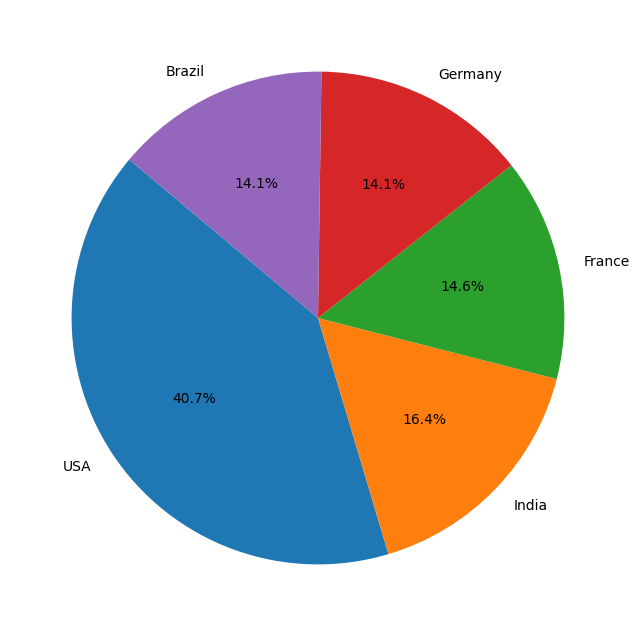

In [88]:
plt.figure(figsize=(8,8))
plt.pie(df_paises_mayor_total_casos['n_total_casos'], labels = df_paises_mayor_total_casos['nombre_pais'],autopct='%1.1f%%', startangle=140)
plt.show()

In [89]:
# Rank 5 países con menor total de caso
df_paises_menor_total_casos = df_paises_transformar.sort_values(by='n_total_casos', ascending=True).head(5)
df_paises_menor_total_casos = df_paises_menor_total_casos[['nombre_pais', 'n_total_casos']]
df_paises_menor_total_casos['%_total_casos'] = df_paises_menor_total_casos['n_total_casos'] / total_casos * 100
df_paises_menor_total_casos['%_total_casos'] = df_paises_menor_total_casos['%_total_casos'].apply(lambda x: f'{x:.2f}%')

In [90]:
df_paises_menor_total_casos

,nombre_pais,n_total_casos,%_total_casos
229,MS Zaandam,9,0.00%
228,Western Sahara,10,0.00%
227,Vatican City,29,0.00%
226,Tokelau,80,0.00%
225,Diamond Princess,712,0.00%


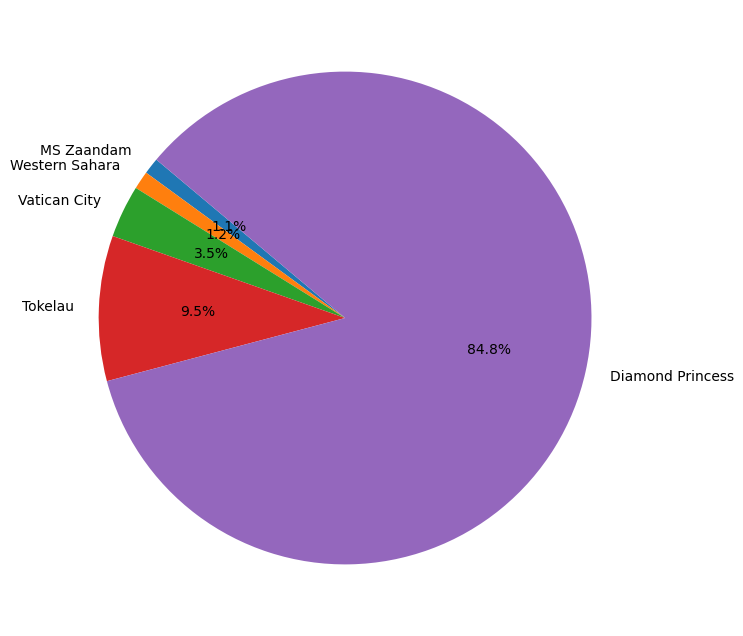

In [91]:
plt.figure(figsize=(8,8))
plt.pie(df_paises_menor_total_casos['n_total_casos'], labels = df_paises_menor_total_casos['nombre_pais'],autopct='%1.1f%%', startangle=140)
plt.show()

In [92]:
# Rank 5 países con mayor total de muertes
df_paises_mayor_muerte = df_paises_transformar.sort_values(by='n_total_muertes', ascending=False).head(5)
df_paises_mayor_muerte = df_paises_mayor_muerte[['nombre_pais', 'n_total_muertes']]
df_paises_mayor_muerte['%_total_casos'] = df_paises_mayor_muerte['n_total_muertes'] / total_muertes * 100
df_paises_mayor_muerte['%_total_casos'] = df_paises_mayor_muerte['%_total_casos'].apply(lambda x: f'{x:.2f}%')

In [93]:
df_paises_mayor_muerte

,nombre_pais,n_total_muertes,%_total_casos
0,USA,1219487,17.41%
4,Brazil,711380,10.15%
1,India,533570,7.62%
9,Russia,402756,5.75%
17,Mexico,334958,4.78%


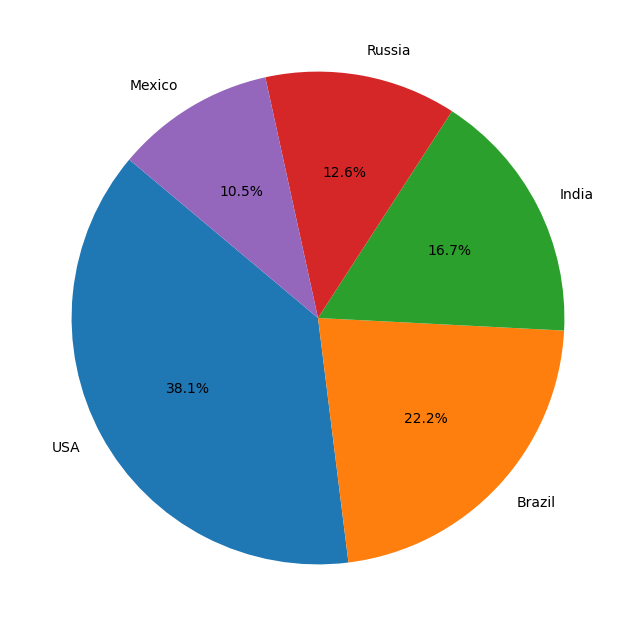

In [94]:
plt.figure(figsize=(8,8))
plt.pie(df_paises_mayor_muerte['n_total_muertes'], labels = df_paises_mayor_muerte['nombre_pais'],autopct='%1.1f%%', startangle=140)
plt.show()

In [95]:
# Rank 5 países con menor total de muertes
df_paises_menor_muerte = df_paises_transformar.sort_values(by='n_total_muertes', ascending=True).head(5)
df_paises_menor_muerte = df_paises_menor_muerte[['nombre_pais', 'n_total_muertes']]
df_paises_menor_muerte['%_total_muerte'] = df_paises_menor_muerte['n_total_muertes'] / total_muertes * 100
df_paises_menor_muerte['%_total_muerte'] = df_paises_menor_muerte['%_total_muerte'].apply(lambda x: f'{x:.2f}%')

In [96]:
df_paises_menor_muerte

,nombre_pais,n_total_muertes,%_total_muerte
227,Vatican City,0,0.00%
221,Saint Helena,0,0.00%
226,Tokelau,0,0.00%
222,Falkland Islands,0,0.00%
224,Niue,0,0.00%


In [97]:
# Rank 5 paises con mayor uso de pruebas
df_paises_mayor_pruebas = df_paises_transformar.sort_values(by='n_total_pruebas', ascending=False).head(5)
df_paises_mayor_pruebas = df_paises_mayor_pruebas[['nombre_pais', 'n_total_pruebas']]
df_paises_mayor_pruebas['%_total_pruebas'] = df_paises_mayor_pruebas['n_total_pruebas'] / total_pruebas * 100
df_paises_mayor_pruebas['%_total_pruebas'] = df_paises_mayor_pruebas['%_total_pruebas'].apply(lambda x: f'{x:.2f}%')

In [98]:
df_paises_mayor_pruebas

,nombre_pais,n_total_pruebas,%_total_pruebas
0,USA,1186851502,17.28%
1,India,935879495,13.63%
8,UK,522526476,7.61%
11,Spain,471036328,6.86%
7,Italy,281126449,4.09%


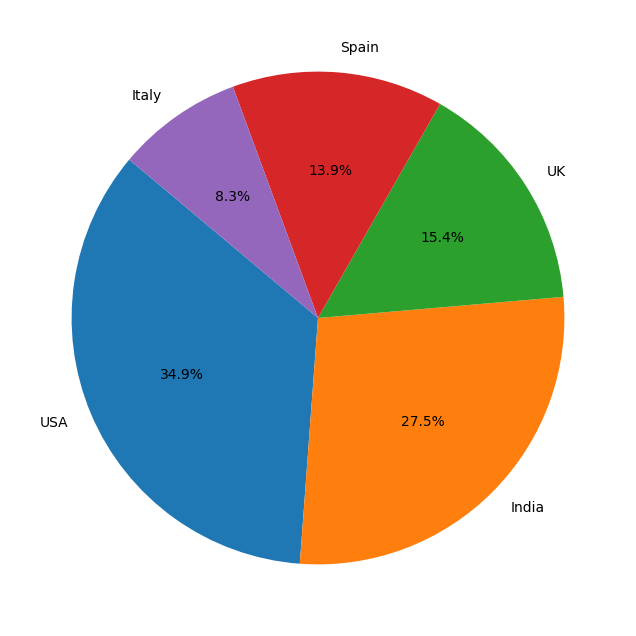

In [59]:
plt.figure(figsize=(8,8))
plt.pie(df_paises_mayor_pruebas['n_total_pruebas'], labels = df_paises_mayor_pruebas['nombre_pais'],autopct='%1.1f%%', startangle=140)
plt.show()

In [99]:
# Rank 5 paises con menor uso de pruebas
df_paises_menor_pruebas = df_paises_transformar.sort_values(by='n_total_pruebas', ascending=True).head(5)
df_paises_menor_pruebas = df_paises_menor_pruebas[['nombre_pais', 'n_total_pruebas']]
df_paises_menor_pruebas['%_total_pruebas'] = df_paises_menor_pruebas['n_total_pruebas'] / total_pruebas * 100
df_paises_menor_pruebas['%_total_pruebas'] = df_paises_menor_pruebas['%_total_pruebas'].apply(lambda x: f'{x:.2f}%')

In [100]:
df_paises_menor_pruebas

,nombre_pais,n_total_pruebas,%_total_pruebas
31,DPRK,0,0.00%
216,Kiribati,0,0.00%
221,Saint Helena,0,0.00%
220,Tuvalu,0,0.00%
227,Vatican City,0,0.00%


In [101]:
print(df_paises_mayor_total_casos)
print(df_paises_mayor_muerte)
print(df_paises_mayor_pruebas)

  nombre_pais  n_total_casos %_total_casos
0         USA      111820082        15.88%
1       India       45035393         6.39%
2      France       40138560         5.70%
3     Germany       38828995         5.51%
4      Brazil       38743918         5.50%
   nombre_pais  n_total_muertes %_total_casos
0          USA          1219487        17.41%
4       Brazil           711380        10.15%
1        India           533570         7.62%
9       Russia           402756         5.75%
17      Mexico           334958         4.78%
   nombre_pais  n_total_pruebas %_total_pruebas
0          USA       1186851502          17.28%
1        India        935879495          13.63%
8           UK        522526476           7.61%
11       Spain        471036328           6.86%
7        Italy        281126449           4.09%


In [102]:
df_paises_transformar['transformar_datetime'] = datetime.now()

In [103]:
df_paises_transformar.to_csv('fuente/transformacion/data_paises.csv', index = False, sep = '|')

## Exportar

In [104]:
df_paises_transformar.to_csv('fuente/carga/data_paises.csv', index = False, sep = '|')

# Análisis de datos

### Mayor cantidad de casos

In [66]:
df_paises_mayor_total_casos

,nombre_pais,n_total_casos,%_total_casos
0,USA,111820082,15.88%
1,India,45035393,6.39%
2,France,40138560,5.70%
3,Germany,38828995,5.51%
4,Brazil,38743918,5.50%


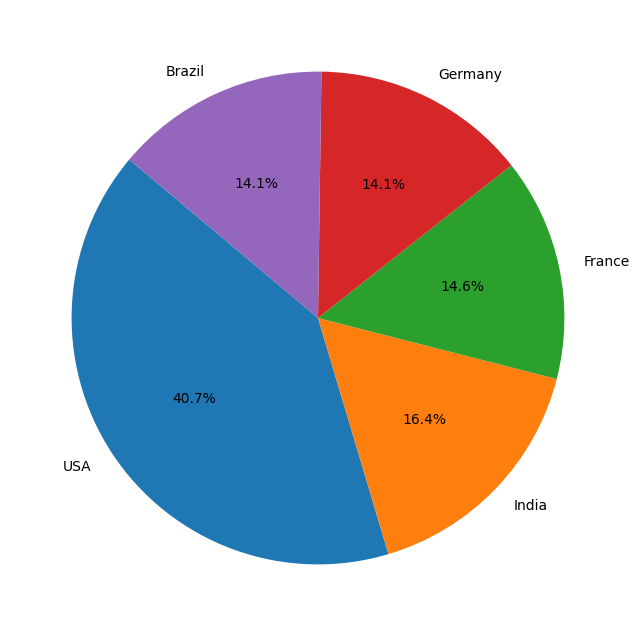

In [67]:
plt.figure(figsize=(8,8))
plt.pie(df_paises_mayor_total_casos['n_total_casos'], labels = df_paises_mayor_total_casos['nombre_pais'],autopct='%1.1f%%', startangle=140)
plt.show()

De acuerdo a la tabla de ranking y el pier chart los países son mayor tasa de de casos confirmados han sido: 
- USA: 111'820'082
- India: 45'035'393
- Francia: 40'138'560
- Alemania: 38'828'995
- Brasil: 38'743'918

Siendo USA el que tiene una mayor tasa de caso confirmados, lo cual puede deberse por factores como los mútliples viajes internacionales lo cual pudo haber hecho que los contagios sean más rápido para darse.

### Menor cantidad de casos

In [68]:
df_paises_menor_total_casos

,nombre_pais,n_total_casos,%_total_casos
229,MS Zaandam,9,0.00%
228,Western Sahara,10,0.00%
227,Vatican City,29,0.00%
226,Tokelau,80,0.00%
225,Diamond Princess,712,0.00%


Por el lado del ranking de los países/locaciones con menor tasa de casos confirmados han sido:
- MS Zaandam: 9
- Sahara Occidental: 10
- Ciudad del Vaticano: 29
- Tokelau: 80
- Diamong Princess: 712

Esto podría deberse porque son países/locaciones muy pequeñas y con pocas cantidades de viajes internacionales lo cual puede que haya permitido que puedan realizar métodos de prevención para mantener una tasa de casos confirmados reducido

### Mayor cantidad de muertes

In [69]:
df_paises_mayor_muerte

,nombre_pais,n_total_muertes,%_total_casos
0,USA,1219487,17.41%
4,Brazil,711380,10.15%
1,India,533570,7.62%
9,Russia,402756,5.75%
17,Mexico,334958,4.78%


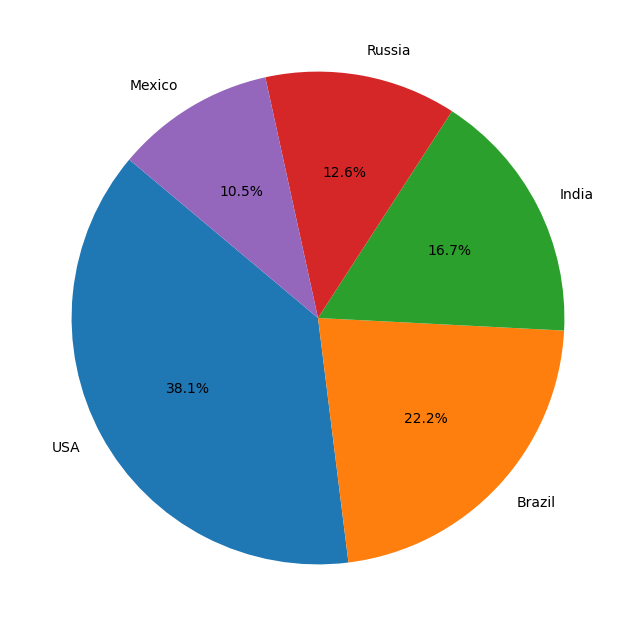

In [70]:
plt.figure(figsize=(8,8))
plt.pie(df_paises_mayor_muerte['n_total_muertes'], labels = df_paises_mayor_muerte['nombre_pais'],autopct='%1.1f%%', startangle=140)
plt.show()

### Menor cantidad de muertes

In [71]:
df_paises_menor_muerte

,nombre_pais,n_total_muertes,%_total_muerte
227,Vatican City,0,0.00%
221,Saint Helena,0,0.00%
226,Tokelau,0,0.00%
222,Falkland Islands,0,0.00%
224,Niue,0,0.00%


### Mayor cantidad de pruebas

In [72]:
df_paises_mayor_pruebas

,nombre_pais,n_total_pruebas,%_total_pruebas
0,USA,1186851502,17.28%
1,India,935879495,13.63%
8,UK,522526476,7.61%
11,Spain,471036328,6.86%
7,Italy,281126449,4.09%


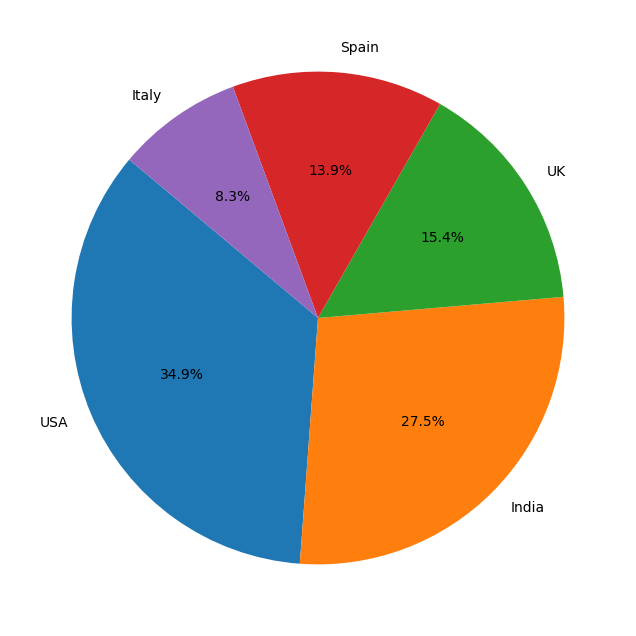

In [73]:
plt.figure(figsize=(8,8))
plt.pie(df_paises_mayor_pruebas['n_total_pruebas'], labels = df_paises_mayor_pruebas['nombre_pais'],autopct='%1.1f%%', startangle=140)
plt.show()

En el ranking de países con mayor tasa de uso de pruebas de descarte de covid se encuentra en primer lugar USA, el cual tambien está en el top 1 para Mayor cantidad de contagios y mayor cantidad de muertes

En conclusión, en los 3 rankings que he realizado sobre los aspectos de: mayor cantidad de contagios, mayor cantidad de muertes y mayor uso de pruebas. Se tiene que Estados Unidos encabeza los 3 tops, mientras que la India encabeza el 2do puesto para los aspectos de Cantidad de contagios y Cantidad de uso de pruebas. Esto puede deberse a como son países altamente comerciales, han estado más propensos a los contagios y por ende el uso necesario de las pruebas de descartes.